# Business Understanding

## Project Domain

## Problem Statements

## Goals

## Solution Statements

# Data Understanding

## Import data dari kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"raihanrizki","key":"770e35c4bcce1cc4d42343fc28e4995a"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d gorororororo23/plant-growth-data-classification

Dataset URL: https://www.kaggle.com/datasets/gorororororo23/plant-growth-data-classification
License(s): other


In [ ]:
!mkdir plant-growth-data-classification
!unzip plant-growth-data-classification.zip -d plant-growth-data-classification
!ls plant-growth-data-classification

Archive:  plant-growth-data-classification.zip
  inflating: plant-growth-data-classification/plant_growth_data.csv  
plant_growth_data.csv


## Import Library yang dibutuhkan

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

## Exploratory Data Analysis

In [ ]:
df = pd.read_csv('/content/plant-growth-data-classification/plant_growth_data.csv')

In [ ]:
df.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0


<ipython-input-27-ee7877fba5d2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Water_Frequency', palette='Set2')


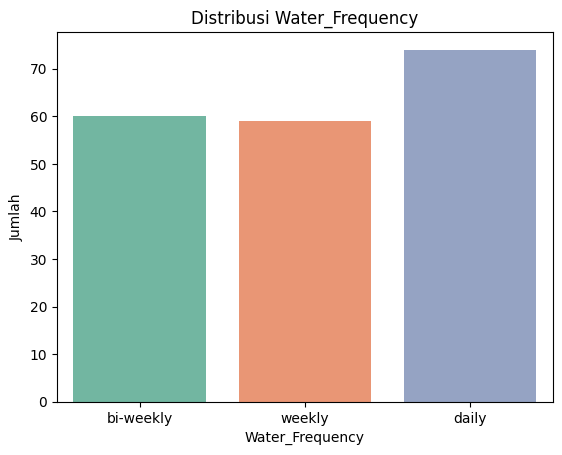

In [ ]:
sns.countplot(data=df, x='Water_Frequency', palette='Set2')
plt.title('Distribusi Water_Frequency')
plt.xlabel('Water_Frequency')
plt.ylabel('Jumlah')
plt.show()

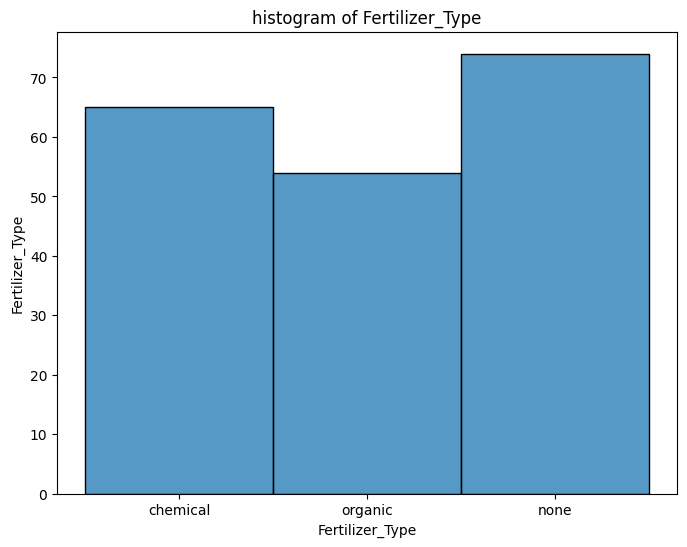

In [ ]:
# histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['Fertilizer_Type'], kde=False)
plt.title('histogram of Fertilizer_Type')
plt.xlabel('Fertilizer_Type')
plt.ylabel('Fertilizer_Type')
plt.show()

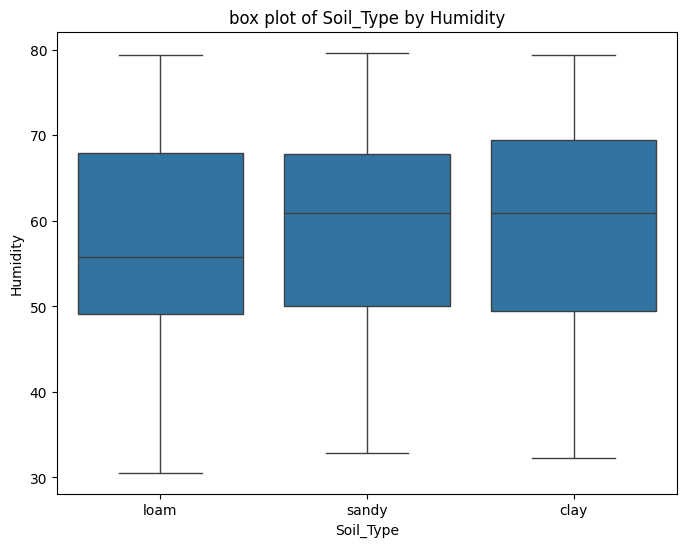

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Soil_Type', y='Humidity', data=df)
plt.title('box plot of Soil_Type by Humidity')
plt.xlabel('Soil_Type')
plt.ylabel('Humidity')
plt.show()

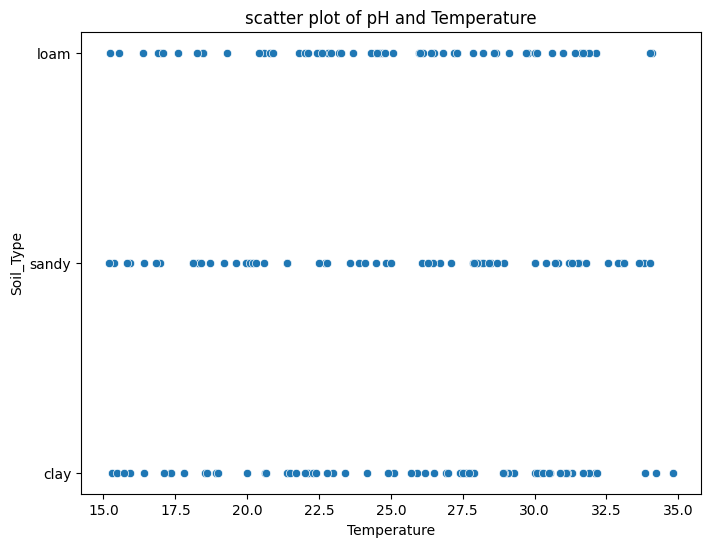

In [ ]:
# scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Temperature", y="Soil_Type", data=df)
plt.title('scatter plot of pH and Temperature')
plt.xlabel('Temperature')
plt.ylabel('Soil_Type')
plt.show()

# Data Preparation

In [ ]:
df.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0


In [ ]:
from sklearn.preprocessing import LabelEncoder # Import the LabelEncoder class

le_Soil_Type = LabelEncoder()
le_Water_Frequency = LabelEncoder()
le_Fertilizer_Type = LabelEncoder()
le_Sunlight_Hours = LabelEncoder()
le_Temperature = LabelEncoder()
le_Humidity = LabelEncoder()

In [ ]:
df['Soil_Type'] = le_Soil_Type.fit_transform(df['Soil_Type'])
df['Water_Frequency'] = le_Water_Frequency.fit_transform(df['Water_Frequency'])
df['Fertilizer_Type'] = le_Fertilizer_Type.fit_transform(df['Fertilizer_Type'])
df['Sunlight_Hours'] = le_Sunlight_Hours.fit_transform(df['Sunlight_Hours'])
df['Temperature'] = le_Temperature.fit_transform(df['Temperature'])
df['Humidity'] = le_Humidity.fit_transform(df['Humidity'])

In [ ]:
x = df.drop ("Growth_Milestone", axis=1)
y = df["Growth_Milestone"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
df.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone,Soil_Type
0,1,37,0,0,169,113,0,1
1,2,0,2,2,136,58,1,2
2,1,165,0,1,74,28,0,1
3,1,141,0,1,29,32,0,1
4,2,148,0,2,24,123,0,2


In [ ]:
#Normalisasi data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Modeling

In [ ]:
#Membangun model ANN
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(x_train.shape[1],))) # hidden layer
model.add(Dense(8, activation='relu')) #hidden layer kedua
model.add(Dense(1, activation='sigmoid'))#output layer untuk klasifikasi biner

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compile model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

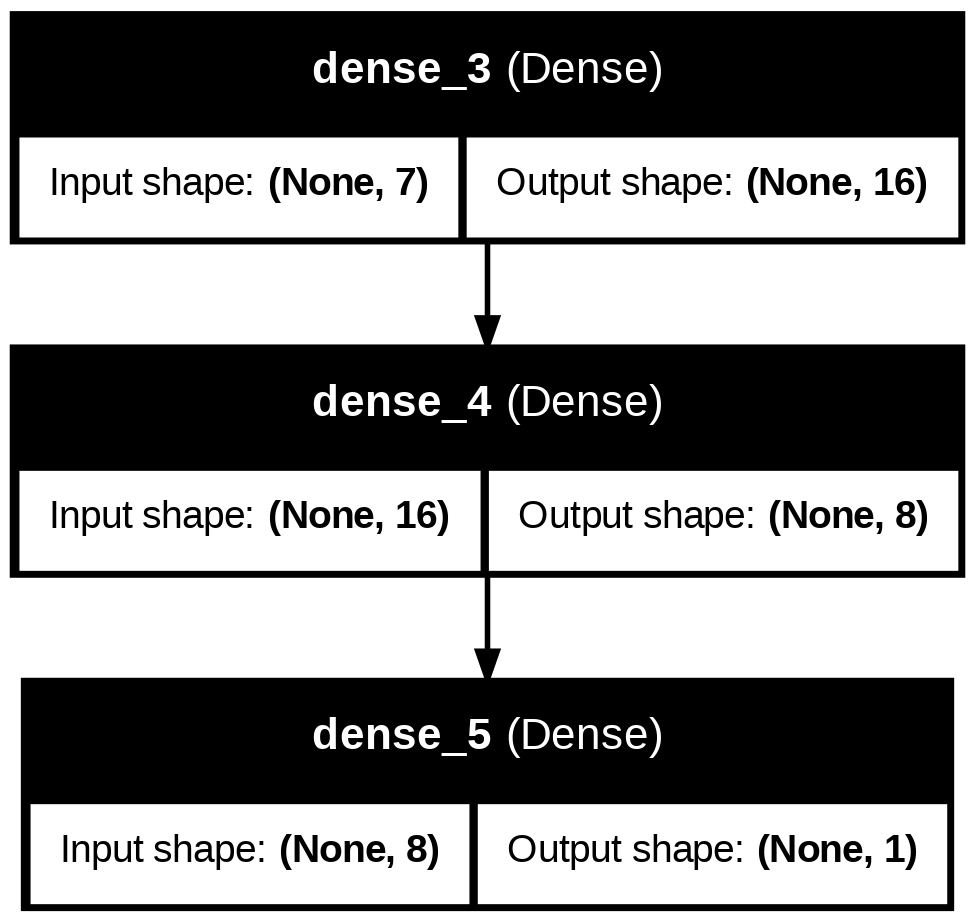

In [ ]:
#plot arsitektur model
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [ ]:
history = model.fit(x_train, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7658 - loss: 0.5219 - val_accuracy: 0.3548 - val_loss: 0.8627
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7550 - loss: 0.5161 - val_accuracy: 0.3548 - val_loss: 0.8662
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7303 - loss: 0.5457 - val_accuracy: 0.3548 - val_loss: 0.8683
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7346 - loss: 0.5150 - val_accuracy: 0.3548 - val_loss: 0.8726
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7930 - loss: 0.4727 - val_accuracy: 0.3548 - val_loss: 0.8789
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8134 - loss: 0.4677 - val_accuracy: 0.3548 - val_loss: 0.8830
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7481 - loss: 0.5012 - val_accuracy: 0.3548 - val_loss: 0.8864
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7720 - loss: 0.5395 - val_accuracy: 0.3871 - val_loss:

# Evaluation

In [ ]:
y_pred_prod = model.predict(x_test)
y_pred = (y_pred_prod > 0.5).astype(int) #konversi probalitas ke kelas biner

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


In [ ]:
y_pred = model.predict(x_test) # Use x_test instead of x_test_scaled
y_pred = model.predict(x_test) # Use x_test instead of x_test_scaled
y_pred_classes = np.argmax(y_pred, axis=1) # Convert probabilities to class labels
accuracy = accuracy_score(y_test, y_pred_classes) # Calculate accuracy using class labels
print(f"Akurasi: {accuracy * 200:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Akurasi: 87.18%


In [ ]:
plt.figure(figsize=(5, 4))

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


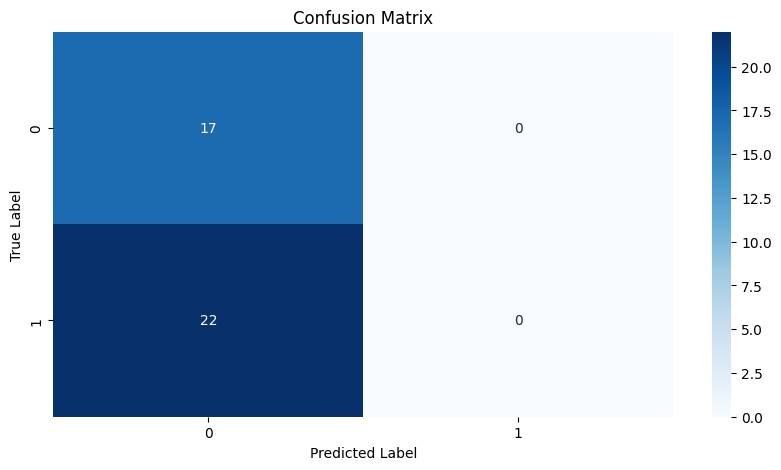

Classification Report:
              precision    recall  f1-score   support

           0       0.44      1.00      0.61        17
           1       0.00      0.00      0.00        22

    accuracy                           0.44        39
   macro avg       0.22      0.50      0.30        39
weighted avg       0.19      0.44      0.26        39



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Deployment

## Model Simulation

In [ ]:
df.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone,Soil_Type
0,1,37,0,0,169,113,0,1
1,2,0,2,2,136,58,1,2
2,1,165,0,1,74,28,0,1
3,1,141,0,1,29,32,0,1
4,2,148,0,2,24,123,0,2


In [ ]:
sample_input = np.array([[2, 37, 0, 2, 169,	113, 0]])
sample_input_df = pd.DataFrame(sample_input)

In [ ]:
sample_input_scaled = scaler.transform(sample_input_df)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
predicted_class = np.argmax(model.predict(sample_input_scaled))
predicted_personality = label_encoder.inverse_transform([predicted_class]) # Use label_encoder instead of le

print(f"pertumbuhan tanaman adalah: {predicted_personality[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
pertumbuhan tanaman adalah: 0


In [101]:
# prompt: buatkan code model simulation dari code saya diatas

import numpy as np

# Assuming 'model', 'scaler', and 'label_encoder' are defined from your previous code

def simulate_plant_growth(soil_type, water_frequency, fertilizer_type, sunlight_hours, temperature, humidity, ph):
    """Simulates plant growth based on input parameters.

    Args:
        soil_type: Type of soil (encoded value).
        water_frequency: Water frequency (encoded value).
        fertilizer_type: Fertilizer type (encoded value).
        sunlight_hours: Sunlight hours (encoded value).
        temperature: Temperature (encoded value).
        humidity: Humidity (encoded value).
        ph: pH value (encoded value).

    Returns:
        Predicted growth milestone.
    """

    sample_input = np.array([[soil_type, water_frequency, fertilizer_type, sunlight_hours, temperature, humidity, ph]])
    sample_input_df = pd.DataFrame(sample_input)
    sample_input_scaled = scaler.transform(sample_input_df)
    predicted_class = np.argmax(model.predict(sample_input_scaled))
    predicted_personality = label_encoder.inverse_transform([predicted_class])
    return predicted_personality[0]


# Example usage:  Replace with your actual encoded values.
soil_type = 2
water_frequency = 37
fertilizer_type = 0
sunlight_hours = 2
temperature = 169
humidity = 113
ph = 0

predicted_growth = simulate_plant_growth(soil_type, water_frequency, fertilizer_type, sunlight_hours, temperature, humidity, ph)
print(f"Predicted plant growth milestone: {predicted_growth}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted plant growth milestone: 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Save Model

In [79]:
# prompt: download save model menggunakan h5

model.save('plant_growth_model.h5')
files.download('plant_growth_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [84]:
# prompt: import apa saja yang digunakan version berapa saja?

# Check library versions
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

print("pandas version:", pd.__version__)
print("numpy version:", np.__version__)
print("seaborn version:", sns.__version__)
print("matplotlib version:", matplotlib.__version__)
print("tensorflow version:", tf.__version__)
print("keras version:", keras.__version__)
print("scikit-learn version:", sklearn.__version__) # Assuming you've imported sklearn


pandas version: 2.2.2
numpy version: 2.0.2
seaborn version: 0.13.2
matplotlib version: 3.10.0
tensorflow version: 2.18.0
keras version: 3.8.0
scikit-learn version: 1.6.1
